LOADING THE DATASET:
Import necessary libraries and load the Titanic dataset. Display the first few rows to get an initial understanding of the data structure.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\dodyn\OneDrive\Desktop\DSinternship/titanic_train.csv')


In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


CHECKING MISSING VALUES:
Check for missing values in the dataset to identify columns that require further handling, such as filling in missing values or dropping the column.

In [18]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

DATASET INFORMATION:
Use 'df.info()' to get a concise summary of the DataFrame, including the number of non-null values in each column and the data type of each column. This helps in identifying columns that need type conversion.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 64.8+ KB


CONVERTING DATA TYPES AND DROPPING THE 'CABIN' COLUMN:
Convert 'Sex' and 'Embarked' columns to categorical types to optimize memory usage and ensure compatibility with certain types of analysis that require categorical data.

In [20]:
# Convert 'Sex' and 'Embarked' to categorical types
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

#  drop the 'Cabin' column as ther is too many missing values
df.drop('Cabin', axis=1, inplace=True)


SURVIVAL RATES BY SEX AND DISTRIBUTION OF AGES:
Calculate and visualize the survival rates by sex to examine the relationship between a passenger's sex and their likelihood of survival. Visualize the distribution of ages among passengers to understand the age demographics of the passengers aboard the Titanic.

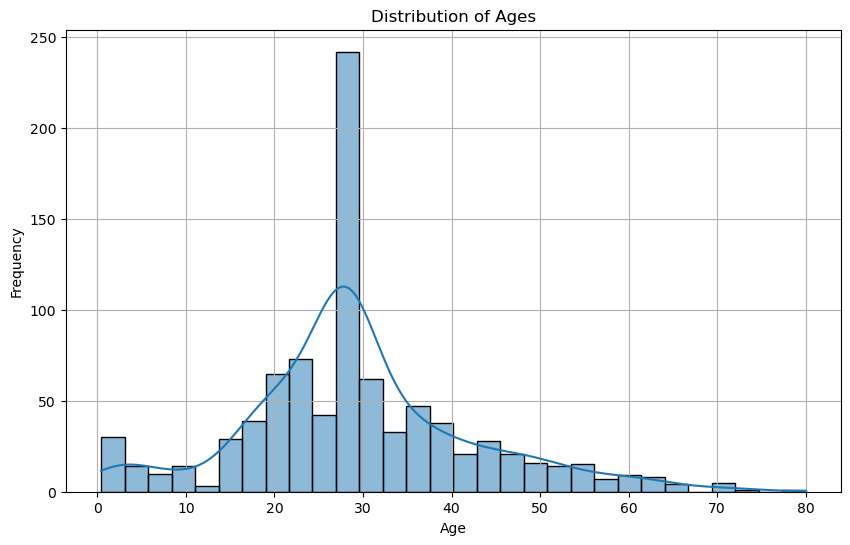

In [7]:
# Survival Rates by Sex
survival_sex = df.groupby('Sex')['Survived'].mean()

# Ages Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

SURVIVAL RATES BY PASSENGER CLASS:
Calculate and visualize survival rates by passenger class to investigate the influence of socio-economic status (reflected by the passenger class) on survival rates.

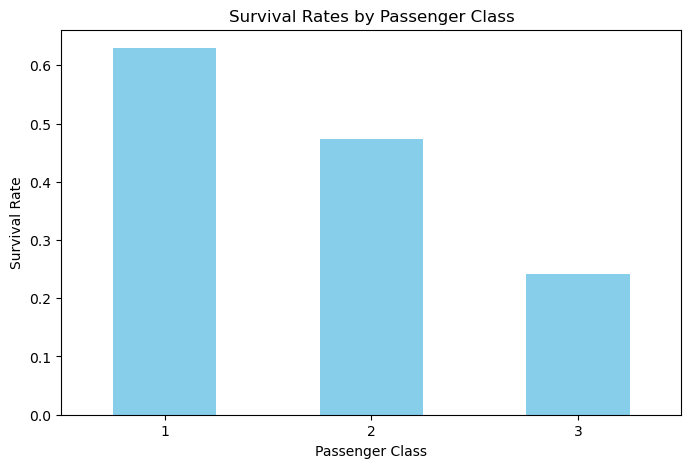

In [8]:
# survival rates by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# survival rates by passenger class
plt.figure(figsize=(8, 5))
survival_by_class.plot(kind='bar', color='skyblue')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


SURVIVAL RATES BY EMBARKATION POINT:
Calculate and visualize the survival rates based on the embarkation point to explore if the port of embarkation had any impact on the survival rates.

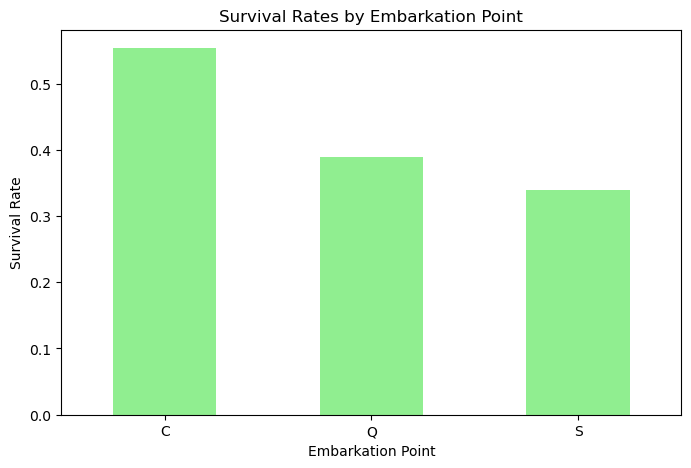

In [9]:
# survival rates by embarkation point
survival_by_embarkation = df.groupby('Embarked')['Survived'].mean()

# survival rates by embarkation point
plt.figure(figsize=(8, 5))
survival_by_embarkation.plot(kind='bar', color='lightgreen')
plt.title('Survival Rates by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


CORRELATION MATRIX OF NUMERIC FEATURES:
Generate a correlation matrix for numeric features to identify potential relationships between different numerical variables.

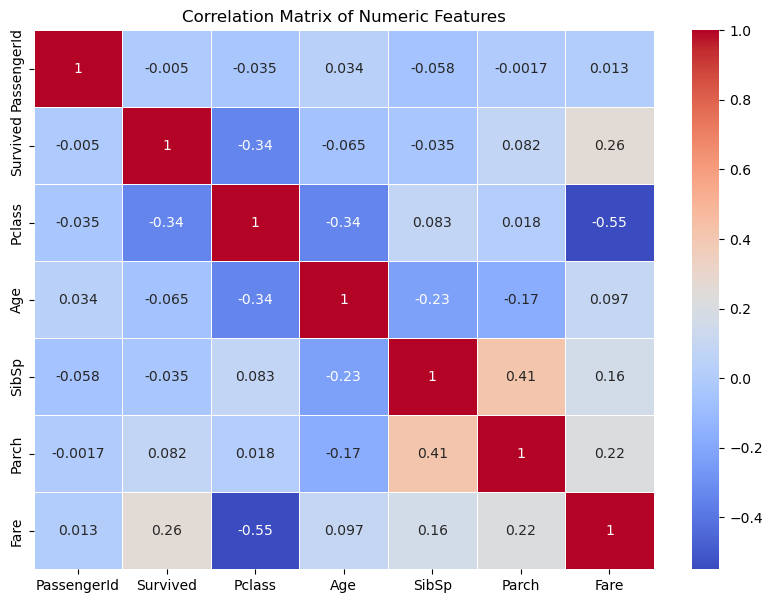

In [11]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


AGE DISTRIBUTION OF SURVIVORS VS NON-SURVIVORS:
Visualize the age distribution for survivors and non-survivors to explore whether age played a significant role in survival chances.

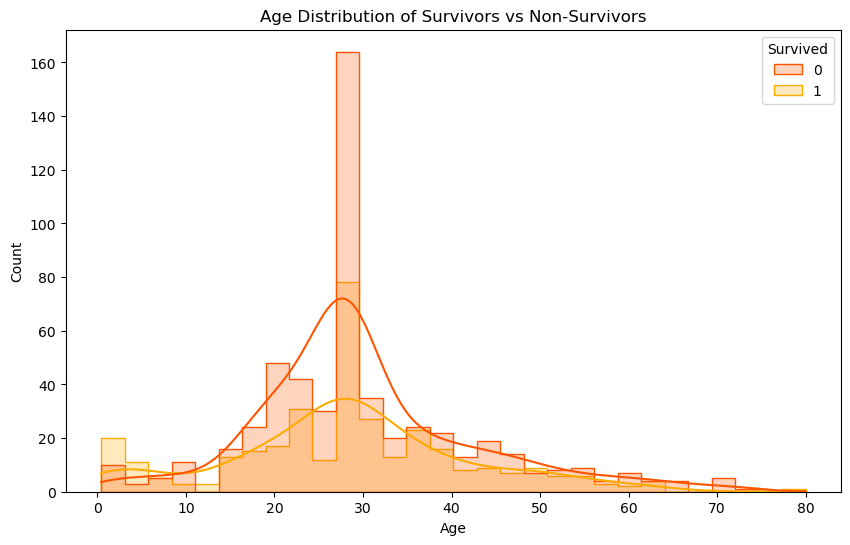

In [12]:
# Plot age distribution for survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element='step', palette='autumn')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
